In [1]:
%load_ext autoreload
%autoreload 2

# Aim: Explore the dataset KPI

    Dataset KPI : Input / Table CDP-Cities-KPI.csv
    https://www.kaggle.com/shabou/cdp-challenge-climate-adaptation-index/data?select=CDP-Cities-KPI.csv

Packages needed
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from statsmodels.graphics.gofplots import qqplot

In [3]:
pd.set_option('display.max_columns', None)
# allows to see all the columns in the notebook

In [5]:
df=pd.read_csv('/home/gaetan/code/maillotg/project_resilience/raw_data/KPI_dataset/CDP-Cities-KPI.csv')
df

,Unnamed: 0,Year.Reported.to.CDP,Account.Number,Organization,City,Country,CDP.Region,First.Time.Discloser,Population,City.Location,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Risk.Health.System,Nb.Adaptation.Actions,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Energy.Efficnecy.Target,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Low.Zero.Emission.Zone,Food.Consumption.Policies,Potable.Water.Supply.Percent,Water.Resource.Management.strategy,lat,long,Country.Code.3
0,1,2020,49335,Metropolitan Government of Nashville and David...,Nashville,United States of America,North America,No,692587.0,POINT (-86.7816 36.1627),Yes,Yes,3.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,Yes,6,In progress,Yes,GPC,Decreased,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,24.0000,20.00,0.00,9.00,37.00,0.00,7.00,1.50,1.50,12.00,Yes,2.10,0.20,6.70,89.00,2.00,No,Yes,100.00,Not intending to undertake,36.162700,-86.781600,USA
1,2,2020,60278,Prefeitura de Fernandópolis,Fernandópolis,Brazil,Latin America,No,68823.0,POINT (-50.2475 -20.2858),Intending to incorporate in the next 2 years,Intending to undertake in the next 2 years,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1,Do not know,Yes,Regional or country specific methodology,Decreased,Do not know,Do not know,No target,NaN,Yes,In progress,0.00,0.0000,0.00,0.00,98.00,0.00,0.00,0.00,2.00,0.00,100.00,In progress,NaN,NaN,NaN,NaN,NaN,Do not know,Yes,100.00,In progress,-20.285800,-50.247500,BRA
2,3,2020,57509,Prefeitura Niterói,Niterói,Brazil,Latin America,No,513584.0,POINT (-43.1184 -22.8928),Yes,Yes,9.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,10,Yes,Yes,GPC,This is our first year of calculation,Not intending to undertake,Yes,No target,In progress,Yes,Do not know,0.00,NaN,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,100.00,Intending to undertake in the next 2 years,41.00,4.00,0.00,26.00,29.00,No,Yes,100.00,Yes,-22.892800,-43.118400,BRA
3,4,2020,60114,City of Gdynia,Gdynia,Poland,Europe,No,246348.0,POINT (18.5305 54.5189),Yes,Yes,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,Base year emissions (absolute) target,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.518900,18.530500,POL
4,5,2020,32550,City of Denver,Denver,United States of America,North America,No,716492.0,POINT (-104.985 39.7376),Yes,Yes,4.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,11,Yes,Yes,GPC,Decreased,Yes,In progress,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,39.0000,33.00,0.00,1.00,0.00,0.00,0.00,3.00,24.00,28.00,In progress,NaN,NaN,NaN,NaN,NaN,No,Yes,100.00,Not intending to undertake,39.737600,-104.985000,USA
5,6,2020,54519,City of Lund,Lund,Sweden,Europe,Yes,124935.0,NaN,Yes,Yes,5.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,4,Yes,Yes,City specific methodology,Decreased,Intending to undertake in the next 2 years,Yes,Base year emissions (absolute) target,Yes,Yes,Yes,0.00,0.0000,0.00,0.00,40.00,39.00,0.00,10.00

In [40]:
df.shape

(615, 58)

In [115]:
print('There are', df['City'].nunique(), 'cities but 615 lines in the data.frame')
print('Number of unique Account.Number :', df['Account.Number'].nunique())
print('Number of unique Organization :', df['Organization'].nunique())

There are 447 cities but 615 lines in the data.frame
Number of unique Account.Number : 566
Number of unique Organization : 566


> There are 566 account number but 447 unique city names : what is happening here ?

> The name of the administration in charge of a city can be different : It can be a Prefecture, Municipality, Metropolitan Government ...

> Each organization has one Account.number

In [ ]:
Print('There are',df.shape[0] - df['Organization'].nunique(), 'that we can\'t explain with the account number')

1.Missing value
---

In [56]:
na_number = df.isna().sum()
na_number

Unnamed: 0                                      0
Year.Reported.to.CDP                            0
Account.Number                                  0
Organization                                    0
City                                          125
Country                                         0
CDP.Region                                      0
First.Time.Discloser                            0
Population                                      1
City.Location                                 170
Sustainability.Targets.Master.Planning         10
Risk.Assessment.Actions                         7
Nb.Hazards.Type                                30
Hazards.Exposure.Level                         42
Adaptation.Challenges.Health                  421
Adaptation.Challenges.Economic                421
Adaptation.Challenges.Environment             421
Adaptation.Challenges.Infrastructure          421
Adaptation.Challenges.Social                  421
Adaptation.Challenges.Governance              421


There are a lot of missing values

Cities / Organization study
---

In [114]:
df['City'].isna().sum()

125

> There are 125 lines without a city name

***Why do we have NA cities ?***

***Can we find informations concerning the NA cities ? (Maybe an error in the questionnaire answers)***

In [110]:
df[df['City'].isna()]

,Unnamed: 0,Year.Reported.to.CDP,Account.Number,Organization,City,Country,CDP.Region,First.Time.Discloser,Population,City.Location,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Risk.Health.System,Nb.Adaptation.Actions,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Energy.Efficnecy.Target,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Low.Zero.Emission.Zone,Food.Consumption.Policies,Potable.Water.Supply.Percent,Water.Resource.Management.strategy,lat,long,Country.Code.3
13,14,2020,848408,Municipio de Cajamarca,NaN,Colombia,Latin America,Yes,17309.0,NaN,Yes,Yes,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Do not know,1,Intending to undertake in the next 2 years,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,No target,Intending to undertake in the next 2 years,Yes,Not intending to undertake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,No,47.00,Yes,-18.936936,-65.376422,COL
16,17,2020,840018,Municipalidad Distrital de Ate,NaN,Peru,Latin America,No,647000.0,NaN,In progress,Yes,2.0,18.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,4.0,Yes,3,Intending to undertake in the next 2 years,In progress,Other,NaN,NaN,NaN,No target,In progress,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In progress,56.00,NaN,39.00,NaN,NaN,No,Do not know,78.00,Intending to undertake in next 2 years,-12.075124,-76.980395,PER
17,18,2020,845302,Paraíso,NaN,Costa Rica,Latin America,Yes,58030.0,NaN,Not intending to incorporate,Not intending to undertake,1.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,1,Not intending to undertake,Not intending to undertake,NaN,NaN,NaN,NaN,No target,Not intending to undertake,Not intending to undertake,Not intending to undertake,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,NaN,NaN,NaN,NaN,NaN,Do not know,Do not know,90.00,Yes,9.976400,-84.833900,CRI
30,31,2020,845309,Puente Piedra,NaN,Peru,Latin America,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,In progress,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,NaN,In progress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.876827,-77.074482,PER
35,36,2020,60400,Municipalidad de Temuco,NaN,Chile,Latin America,No,282415.0,NaN,Yes,Intending to undertake in the next 2 years,2.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,1,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,Fixed level target,In progress,Intending to undertake in the next 2 years,Not intending to undertake,53.70,3.9000,12.10,NaN,NaN,NaN,4.50,25.80,NaN,NaN,NaN,Do not know,NaN,NaN,NaN,NaN,NaN,No,No,100.00,Intending to undertake in next 2 years,-38.739793,-72.590929,CHL
44,45,2020,59558,"City of Holland, MI",NaN,United States of America,North America,Yes,33216.0,NaN,Yes,Yes,1.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,1,Do not know,Yes,ICLEI,Decreased,Not intending to undertake,Not intending to undertake,Base year intensity target,Yes,Yes,Yes,0.00,21.2000,61.07,0.00,0.00,0.00,0.00,10.09,0.00,7.64,7.64,Yes,1.30,1.50,

In [111]:
df['Account.Number'].nunique()
827048

566

In [138]:
account_dict = dict(df.groupby(by = ['Account.Number']).size())
account_dict.values()

dict_values([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [142]:
redondant_account = list()

for key, value in account_dict.items():
    if int(value) > 1:
        print(key, ':', value)
        redondant_account.append(key)

2185 : 2
10894 : 2
13506 : 2
31111 : 2
31148 : 2
31157 : 2
31165 : 2
31176 : 2
31182 : 2
32480 : 2
35867 : 2
35878 : 2
35884 : 2
35893 : 2
35993 : 2
36426 : 2
42384 : 2
44185 : 2
49330 : 2
49334 : 2
49347 : 2
50203 : 2
50543 : 2
50544 : 3
54402 : 2
54510 : 2
54521 : 2
59167 : 2
59180 : 2
59572 : 2
59996 : 2
60092 : 2
60105 : 2
60216 : 2
60229 : 2
60546 : 2
60656 : 2
63562 : 2
68373 : 2
73413 : 3
73669 : 2
73879 : 2
826450 : 2
827048 : 3
831618 : 2
834374 : 2


### Check for Account.Number 63562

In [144]:
df[df['Account.Number'] == 63562]

,Unnamed: 0,Year.Reported.to.CDP,Account.Number,Organization,City,Country,CDP.Region,First.Time.Discloser,Population,City.Location,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Risk.Health.System,Nb.Adaptation.Actions,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Energy.Efficnecy.Target,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Low.Zero.Emission.Zone,Food.Consumption.Policies,Potable.Water.Supply.Percent,Water.Resource.Management.strategy,lat,long,Country.Code.3
566,567,2020,63562,"City of South Bend, IN",South Bend,United States of America,North America,No,102026.0,POINT (41.6754 -86.2532),Yes,Intending to undertake in the next 2 years,5.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,1,Intending to undertake in the next 2 years,Yes,GPC,This is our first year of calculation,Not intending to undertake,Not intending to undertake,Fixed level target,Yes,Yes,Intending to undertake in the next 2 years,0.0,48.6,0.0,0.0,0.4,42.3,0.0,0.0,0.3,8.4,9.1,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,NaN,No,No,100.0,Not intending to undertake,41.6767,-86.2696,USA
567,568,2020,63562,"City of South Bend, IN",South Bend,United States of America,North America,No,102026.0,POINT (41.6754 -86.2532),Yes,Intending to undertake in the next 2 years,5.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,1,Intending to undertake in the next 2 years,Yes,GPC,This is our first year of calculation,Not intending to undertake,Not intending to undertake,Base year emissions (absolute) target,Yes,Yes,Intending to undertake in the next 2 years,0.0,48.6,0.0,0.0,0.4,42.3,0.0,0.0,0.3,8.4,9.1,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,NaN,No,No,100.0,Not intending to undertake,41.6767,-86.2696,USA


### Check for the Account.Number 827048

In [113]:
df[df['Account.Number'] == 827048]

,Unnamed: 0,Year.Reported.to.CDP,Account.Number,Organization,City,Country,CDP.Region,First.Time.Discloser,Population,City.Location,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Risk.Health.System,Nb.Adaptation.Actions,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Energy.Efficnecy.Target,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Low.Zero.Emission.Zone,Food.Consumption.Policies,Potable.Water.Supply.Percent,Water.Resource.Management.strategy,lat,long,Country.Code.3
563,564,2020,827048,Zhenjiang Municipal People's Government,NaN,China,East Asia,No,3186300.0,NaN,Yes,Yes,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,Yes,Regional or country specific methodology,Do not know,Yes,Do not know,Fixed level target,Yes,Yes,Yes,NaN,60.4,7.0,NaN,NaN,15.7,18.8,13.8,9.8,23.5,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,NaN,NaN,32.190111,119.420058,CHN
564,565,2020,827048,Zhenjiang Municipal People's Government,NaN,China,East Asia,No,3186300.0,NaN,Yes,Yes,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,Yes,Regional or country specific methodology,Do not know,Yes,Do not know,Base year emissions (absolute) target,Yes,Yes,Yes,NaN,60.4,7.0,NaN,NaN,15.7,18.8,13.8,9.8,23.5,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,NaN,NaN,32.190111,119.420058,CHN
565,566,2020,827048,Zhenjiang Municipal People's Government,NaN,China,East Asia,No,3186300.0,NaN,Yes,Yes,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Yes,Yes,Regional or country specific methodology,Do not know,Yes,Do not know,Base year intensity target,Yes,Yes,Yes,NaN,60.4,7.0,NaN,NaN,15.7,18.8,13.8,9.8,23.5,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Do not know,NaN,NaN,32.190111,119.420058,CHN


**GHG.Emissions.Reductions Targets takes different values for the account/organization which have several entry in the dataframe**

> Is the GHG.Emissions.Reductions Targets feature important for the calcul of readiness and vulnerability ?

Country study
---

***I didn't erase the redondancy of the Account.numbers***

In [107]:
print('There are', df['Country'].nunique(), 'countries with cities that answered the questionnaire in 2020')

There are 75 countries with cities that answered the questionnaire in 2020


In [103]:
df['Country'].count()

615

In [82]:
cities_byCountry = df.groupby(by = ['Country']).size()

In [146]:
country_dict = dict(cities_byCountry)

In [147]:
counter = 0
for country,ncities in country_dict.items():
    if int(ncities) > 10:
        print(country, ':', ncities)
        counter = counter + 1

Argentina : 14
Australia : 11
Brazil : 70
Canada : 27
Colombia : 19
Denmark : 16
Italy : 15
Mexico : 29
Peru : 15
Portugal : 18
Sweden : 13
Turkey : 11
United Kingdom of Great Britain and Northern Ireland : 31
United States of America : 156


In [152]:
print('There are', counter, 'countries with more than 10 cities which answered the questionnaires in 2020')

There are 14 countries with more than 10 cities which answered the questionnaires in 2020


### Check the repartition by CDP.Region

In [155]:
region_dict = dict(df.groupby(by = ['CDP.Region']).size())
region_dict

{'Africa': 31,
 'East Asia': 28,
 'Europe': 153,
 'Latin America': 176,
 'Middle East': 5,
 'North America': 183,
 'South and West Asia': 4,
 'Southeast Asia and Oceania': 35}

> Organizations are mainly localized un Europe, Latin America and North America

Population study
---

In [8]:
df_pop = df['Population']

In [9]:
df_pop.describe()

count    6.140000e+02
mean     3.928472e+06
std      5.808346e+07
min      2.400000e+02
25%      7.400075e+04
50%      2.463380e+05
75%      7.911088e+05
max      1.383432e+09
Name: Population, dtype: float64

(array([481.,  52.,  22.,  17.,   6.,   4.,   6.,   3.,   6.,   4.]),
 array([2.400000e+02, 9.501960e+05, 1.900152e+06, 2.850108e+06,
        3.800064e+06, 4.750020e+06, 5.699976e+06, 6.649932e+06,
        7.599888e+06, 8.549844e+06, 9.499800e+06]),
 <BarContainer object of 10 artists>)

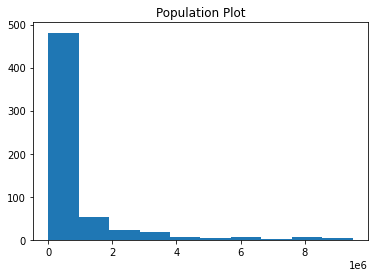

In [34]:
fig1, ax1 = plt.subplots()
ax1.set_title('Population Plot')
# ax1.boxplot(df_pop.to_numeric < 1*10**7)
ax1.hist(x=df.loc[df['Population'] < 1*10**7, 'Population'])

> The outliers are too far from the rest of the distribution

In [62]:
pop_list = [1*10**1,1*10**2,1*10**3,1*10**4,1*10**5,1*10**6,1*10**7,1*10**8, 1*10**9, 1*10**10]

counter = 0
cities_bypop = list()

while counter < 9:
    habitants = df.loc[df['Population'] < pop_list[counter + 1], 'Population'].count() - df.loc[df['Population'] < pop_list[counter], 'Population'].count()
    print('Number of cities with a population comprised between', pop_list[counter], 'and', pop_list[counter + 1], '=', habitants, 'habitants')
    cities_bypop.append(habitants)
    counter = counter + 1

Number of cities with a population comprised between 10 and 100 = 0 habitants
Number of cities with a population comprised between 100 and 1000 = 4 habitants
Number of cities with a population comprised between 1000 and 10000 = 19 habitants
Number of cities with a population comprised between 10000 and 100000 = 174 habitants
Number of cities with a population comprised between 100000 and 1000000 = 291 habitants
Number of cities with a population comprised between 1000000 and 10000000 = 113 habitants
Number of cities with a population comprised between 10000000 and 100000000 = 11 habitants
Number of cities with a population comprised between 100000000 and 1000000000 = 1 habitants
Number of cities with a population comprised between 1000000000 and 10000000000 = 1 habitants


In [66]:
# df[df['Population'] > 1*10**7;'Country']

df.loc[df['Population'] > 1*10**6, 'Country'].unique()

array(['Brazil', 'Taiwan, Greater China', 'Honduras', 'Nigeria',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Malaysia', 'Republic of Korea',
       'Colombia', 'Canada', 'Turkey', 'China', 'Indonesia', 'Peru',
       'Madagascar', 'Uganda', 'Jordan',
       'China, Hong Kong Special Administrative Region', 'Mexico',
       'United Arab Emirates', 'Singapore', 'Italy', 'India',
       'South Africa', 'France', 'Russian Federation',
       'United Republic of Tanzania', 'Bangladesh', 'Republic of Moldova',
       'Japan', 'Senegal', 'Argentina', 'Uruguay', 'Philippines',
       'Sierra Leone', 'Ghana', 'Germany', 'Thailand', 'Burundi', 'Spain',
       'New Zealand', 'Morocco', 'Ethiopia', 'Kenya', 'Bulgaria',
       'Ecuador'], dtype=object)

Categorical features
---

In [106]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,Organization,City,Country,CDP.Region,First.Time.Discloser,City.Location,Sustainability.Targets.Master.Planning,Risk.Assessment.Actions,Risk.Health.System,Adaptation.Plan,City.Wide.Emissions.Inventory,GHG.Emissions.Primary.protocol,GHG.Emissions.Evolution,GHG.Emissions.Consumption,GHG.Emissions.External.Verification,GHG.Emissions.Reductions.Targets,Emissions.Reductions.Mitigation.Planning,Opportunities.Collaboration,Renewable.Energy.Target,Energy.Efficnecy.Target,Low.Zero.Emission.Zone,Food.Consumption.Policies,Water.Resource.Management.strategy,Country.Code.3
0,Metropolitan Government of Nashville and David...,Nashville,United States of America,North America,No,POINT (-86.7816 36.1627),Yes,Yes,Yes,In progress,Yes,GPC,Decreased,Not intending to undertake,Intending to undertake in the next 2 years,Base year emissions (absolute) target,Yes,Yes,Yes,Yes,No,Yes,Not intending to undertake,USA
1,Prefeitura de Fernandópolis,Fernandópolis,Brazil,Latin America,No,POINT (-50.2475 -20.2858),Intending to incorporate in the next 2 years,Intending to undertake in the next 2 years,No,Do not know,Yes,Regional or country specific methodology,Decreased,Do not know,Do not know,No target,NaN,Yes,In progress,In progress,Do not know,Yes,In progress,BRA
2,Prefeitura Niterói,Niterói,Brazil,Latin America,No,POINT (-43.1184 -22.8928),Yes,Yes,Yes,Yes,Yes,GPC,This is our first year of calculation,Not intending to undertake,Yes,No target,In progress,Yes,Do not know,Intending to undertake in the next 2 years,No,Yes,Yes,BRA
3,City of Gdynia,Gdynia,Poland,Europe,No,POINT (18.5305 54.5189),Yes,Yes,NaN,Yes,Intending to undertake in the next 2 years,NaN,NaN,NaN,NaN,Base year emissions (absolute) target,Yes,NaN,Yes,NaN,NaN,NaN,NaN,POL
4,City of Denver,Denver,United States of America,North America,No,POINT (-104.985 39.7376),Yes,Yes,Yes,Yes,Yes,GPC,Decreased,Yes,In progress,Base year emissions (absolute) target,Yes,Yes,Yes,In progress,No,Yes,Not intending to undertake,USA


In [156]:
df_cat.columns

Index(['Organization', 'City', 'Country', 'CDP.Region', 'First.Time.Discloser',
       'City.Location', 'Sustainability.Targets.Master.Planning',
       'Risk.Assessment.Actions', 'Risk.Health.System', 'Adaptation.Plan',
       'City.Wide.Emissions.Inventory', 'GHG.Emissions.Primary.protocol',
       'GHG.Emissions.Evolution', 'GHG.Emissions.Consumption',
       'GHG.Emissions.External.Verification',
       'GHG.Emissions.Reductions.Targets',
       'Emissions.Reductions.Mitigation.Planning',
       'Opportunities.Collaboration', 'Renewable.Energy.Target',
       'Energy.Efficnecy.Target', 'Low.Zero.Emission.Zone',
       'Food.Consumption.Policies', 'Water.Resource.Management.strategy',
       'Country.Code.3'],
      dtype='object')

Feature meaning study
---

In [10]:
features = df.columns

In [15]:
for feature in features:
    print(feature)

Unnamed: 0
Year.Reported.to.CDP
Account.Number
Organization
City
Country
CDP.Region
First.Time.Discloser
Population
City.Location
Sustainability.Targets.Master.Planning
Risk.Assessment.Actions
Nb.Hazards.Type
Hazards.Exposure.Level
Adaptation.Challenges.Health
Adaptation.Challenges.Economic
Adaptation.Challenges.Environment
Adaptation.Challenges.Infrastructure
Adaptation.Challenges.Social
Adaptation.Challenges.Governance
Adaptation.Challenges.Education
Adaptation.Challenges.Level
Risk.Health.System
Nb.Adaptation.Actions
Adaptation.Plan
City.Wide.Emissions.Inventory
GHG.Emissions.Primary.protocol
GHG.Emissions.Evolution
GHG.Emissions.Consumption
GHG.Emissions.External.Verification
GHG.Emissions.Reductions.Targets
Emissions.Reductions.Mitigation.Planning
Opportunities.Collaboration
Renewable.Energy.Target
Electricity.Source.Biomass
Electricity.Source.Coal
Electricity.Source.Gas
Electricity.Source.Geothermal
Electricity.Source.Hydro
Electricity.Source.Nuclear
Electricity.Source.Oil
Electr

'Electricity.Source.Biomass', 'Electricity.Source.Coal',
       'Electricity.Source.Gas', 'Electricity.Source.Geothermal',
       'Electricity.Source.Hydro', 'Electricity.Source.Nuclear',
       'Electricity.Source.Oil', 'Electricity.Source.Other',
       'Electricity.Source.Solar', 'Electricity.Source.Wind',
       'Electricity.Source.Renewable'

List of columns to keep

Nb.Hazards.Type
Hazards.Exposure.Level
Nb.Adaptation.Actions

Electricity.Source.Biomass
Electricity.Source.Coal
Electricity.Source.Gas
Electricity.Source.Geothermal
Electricity.Source.Hydro
Electricity.Source.Nuclear
Electricity.Source.Oil
Electricity.Source.Other
Electricity.Source.Solar
Electricity.Source.Wind
Electricity.Source.Renewable

Transport.Mode.Passenger.Public
Transport.Mode.Passenger.Cycling
Transport.Mode.Passenger.Other
Transport.Mode.Passenger.Private.motorized
Transport.Mode.Passenger.Walking

Potable.Water.Supply.Percent

Select the Electricity.Source features
---

In [51]:
Electricity_features = ['Electricity.Source.Biomass','Electricity.Source.Coal','Electricity.Source.Gas','Electricity.Source.Geothermal','Electricity.Source.Hydro','Electricity.Source.Nuclear','Electricity.Source.Oil','Electricity.Source.Other','Electricity.Source.Solar','Electricity.Source.Wind','Electricity.Source.Renewable']

df_Electricity = df[Electricity_features]

In [53]:
df_Electricity.head()

,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable
0,0.0,24.0,20.0,0.0,9.0,37.0,0.0,7.0,1.5,1.5,12.0
1,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,2.0,0.0,100.0
2,0.0,NaN,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,39.0,33.0,0.0,1.0,0.0,0.0,0.0,3.0,24.0,28.0


<AxesSubplot:ylabel='Frequency'>

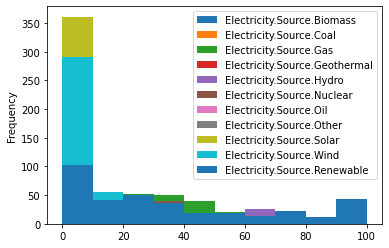

In [54]:
df_Electricity.plot.hist()

/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

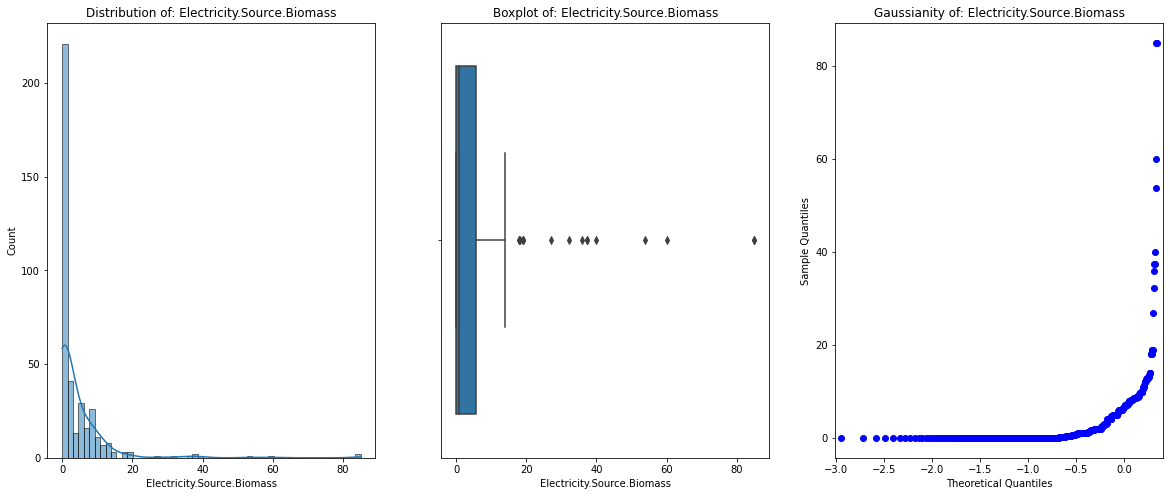

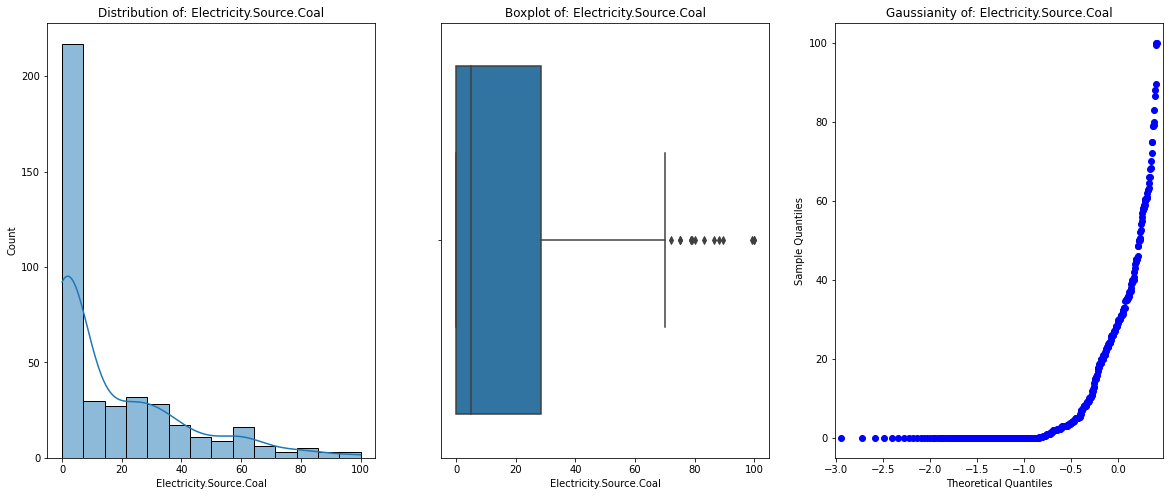

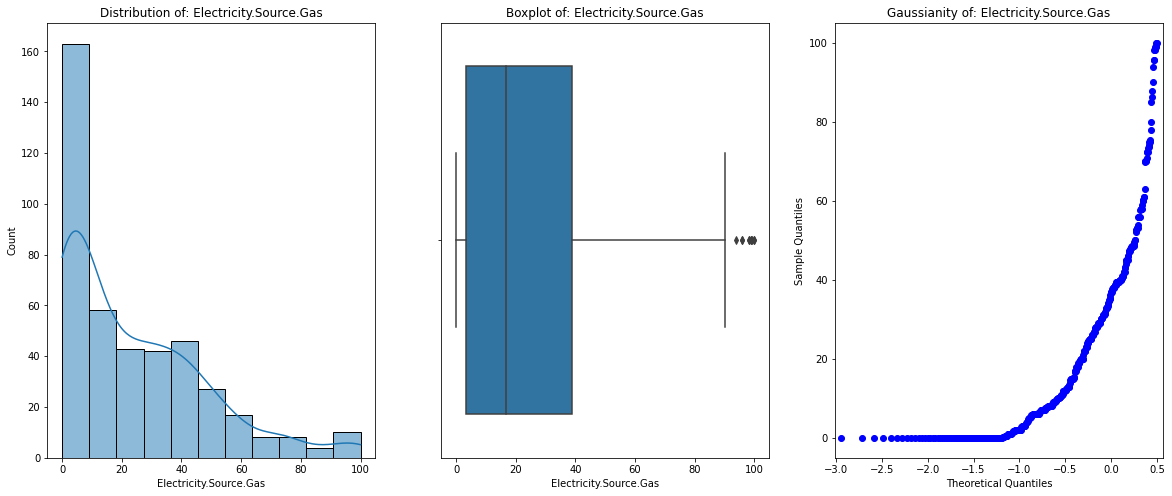

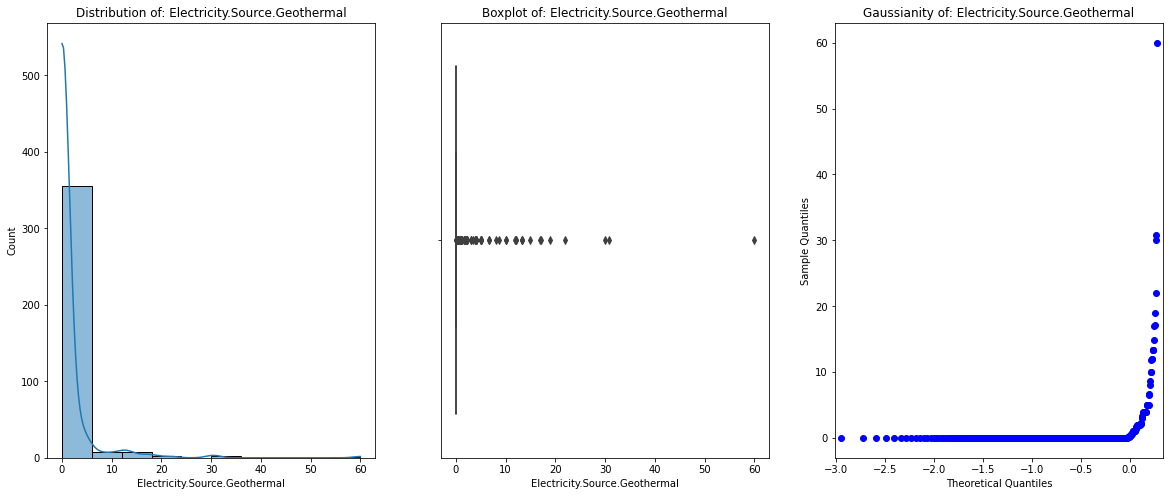

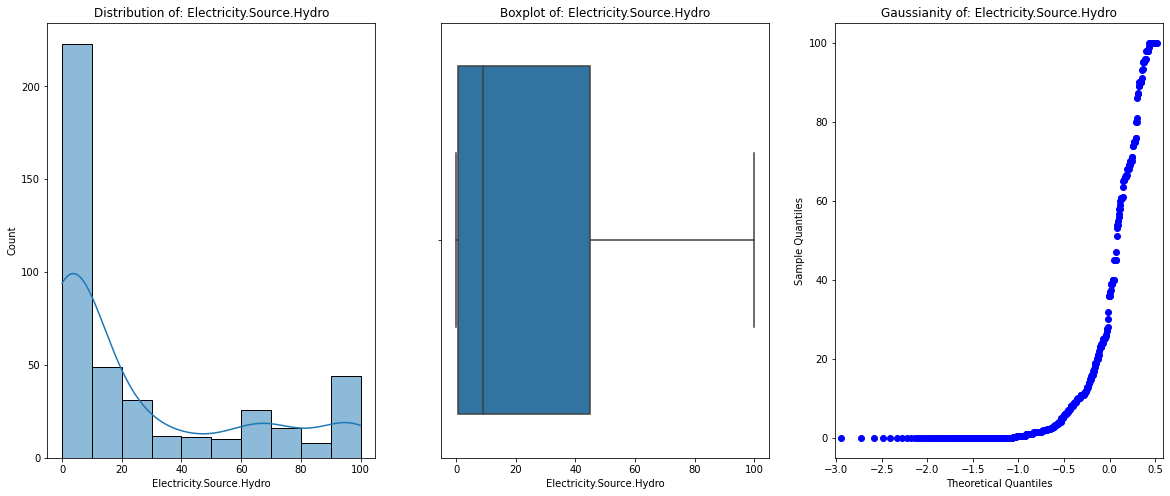

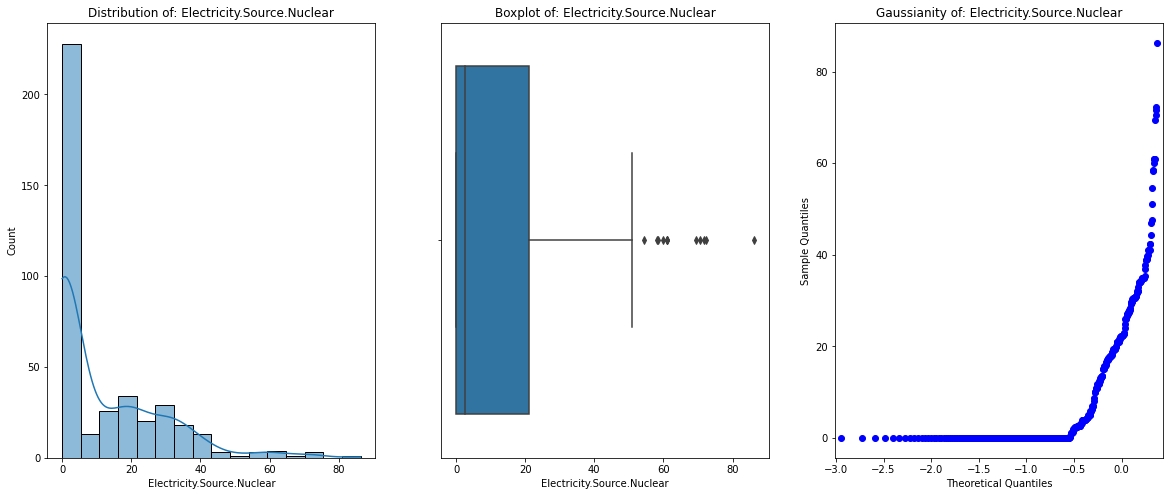

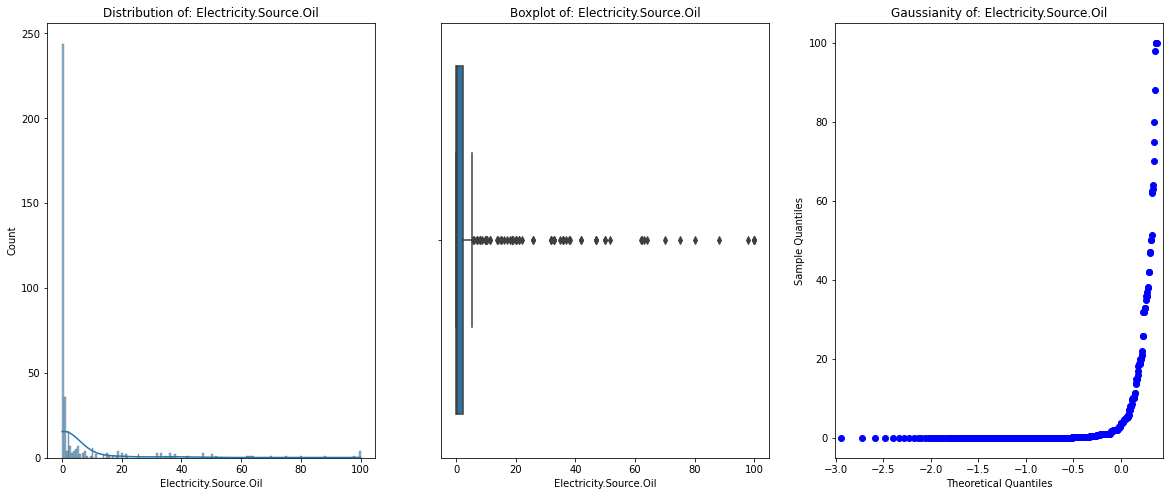

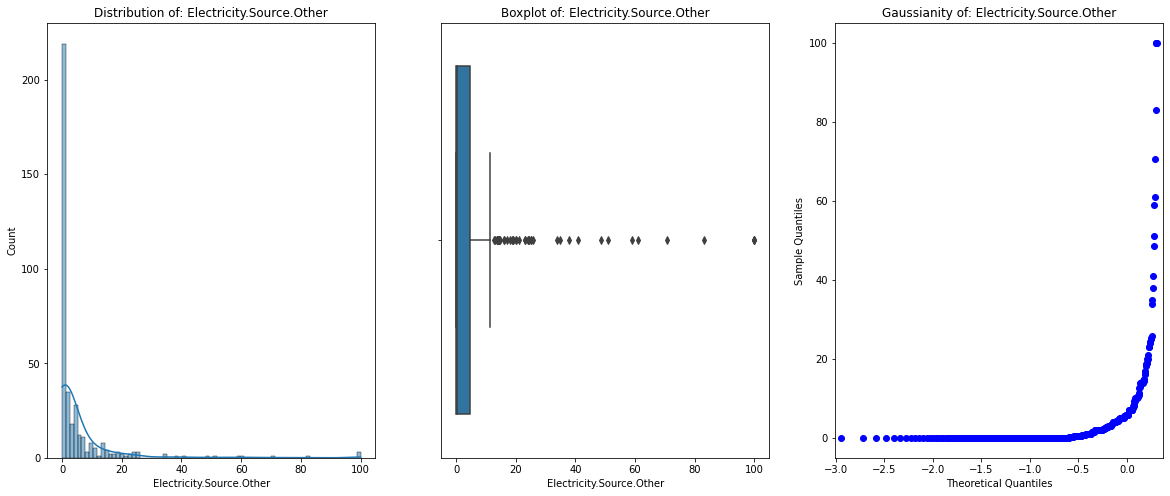

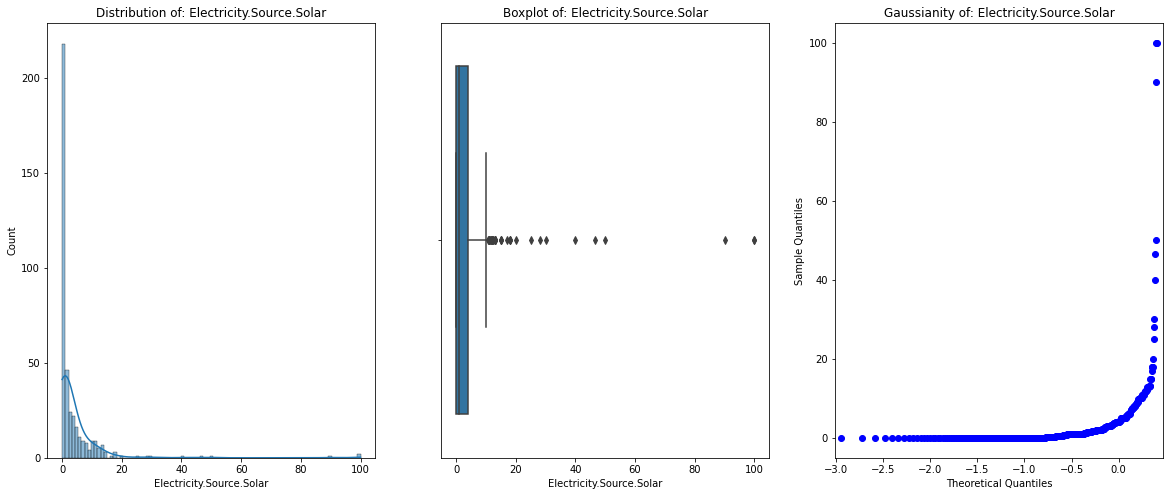

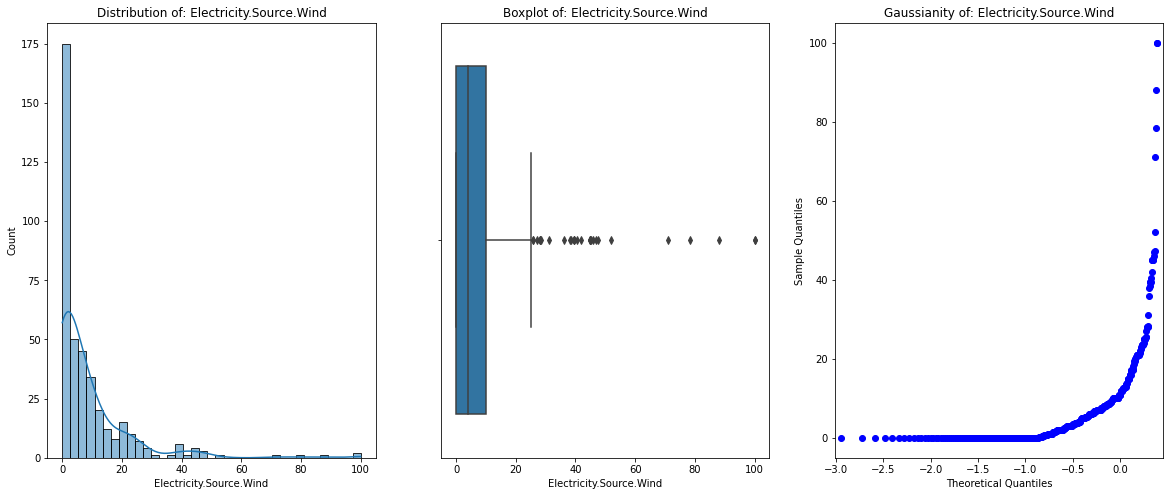

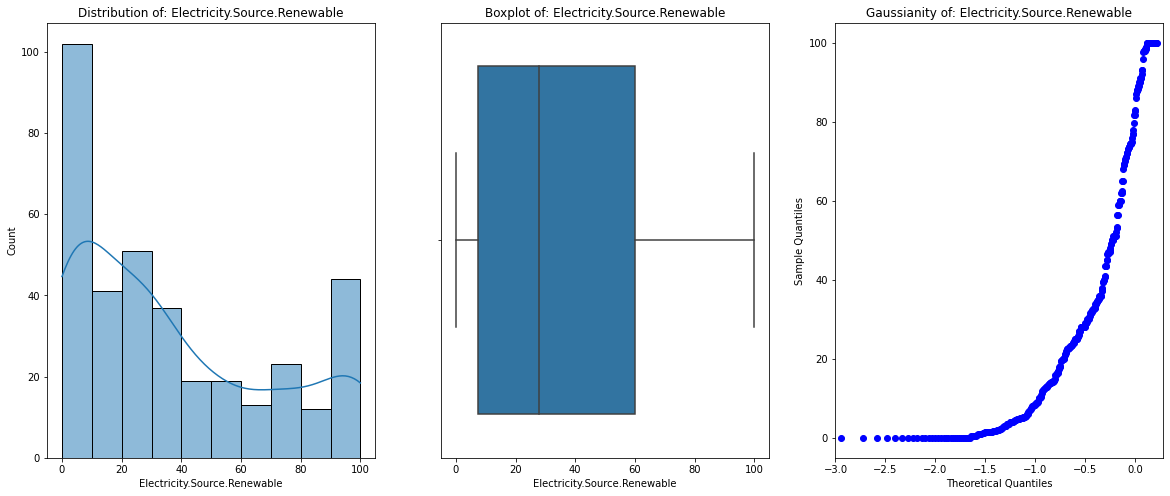

In [81]:
for numerical_feature in df_Electricity.columns:
    fig, ax =plt.subplots(1,3,figsize=(20,8))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = df_Electricity[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(df_Electricity[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df_Electricity[numerical_feature],line='s',ax=ax[2])
    fig.show()

Select the Transport.Mode features
---

In [27]:
Transport_features = ['Transport.Mode.Passenger.Public','Transport.Mode.Passenger.Cycling','Transport.Mode.Passenger.Other','Transport.Mode.Passenger.Private.motorized','Transport.Mode.Passenger.Walking']

df_Transport = df[Transport_features]

In [50]:
df_Transport.head()

,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking
0,2.1,0.2,6.7,89.0,2.0
1,NaN,NaN,NaN,NaN,NaN
2,41.0,4.0,0.0,26.0,29.0
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


The transport.mode features correspond to percentages > Those features have to be analyzed as a whole

<AxesSubplot:ylabel='Frequency'>

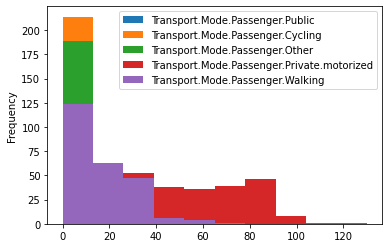

In [28]:
df_Transport.plot.hist()

/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

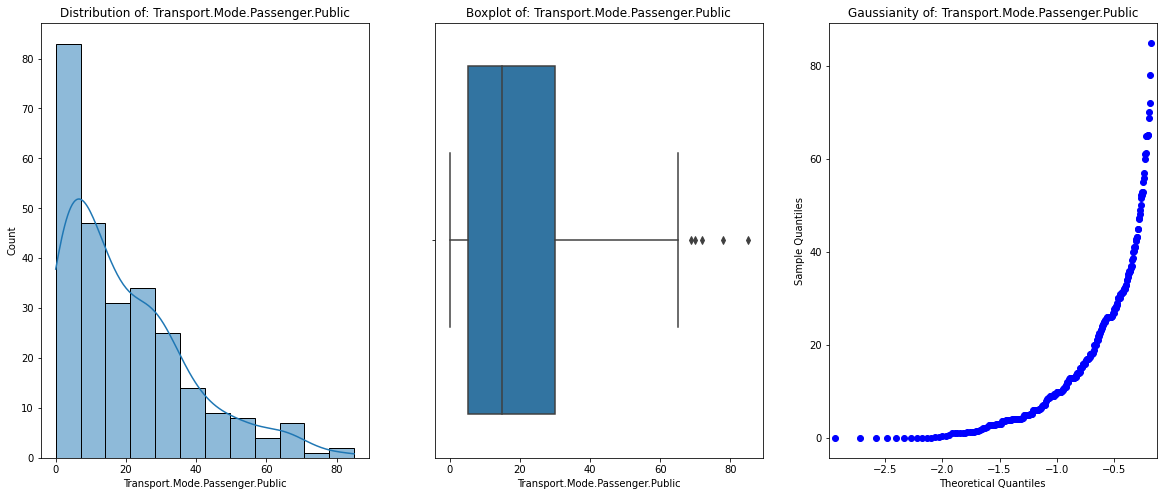

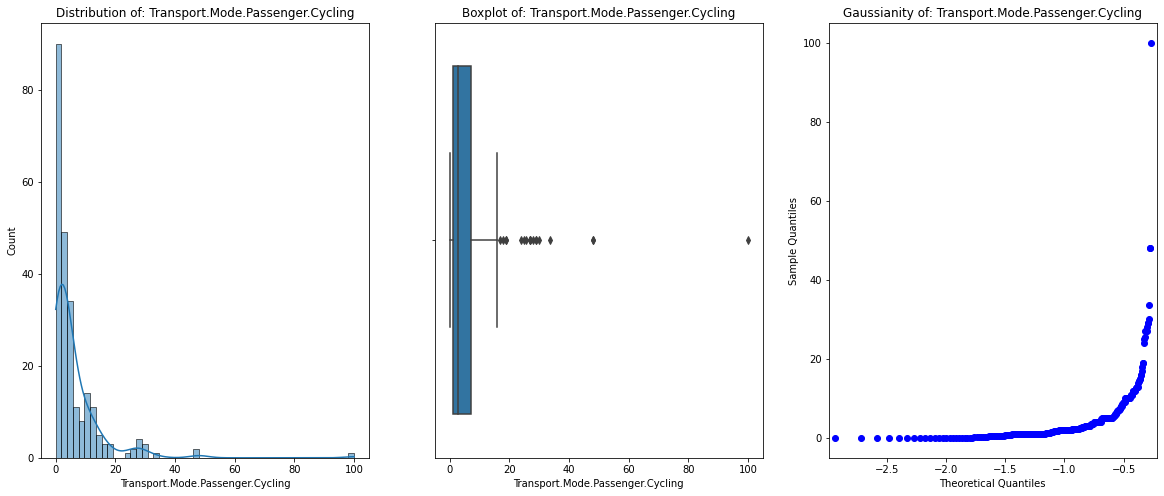

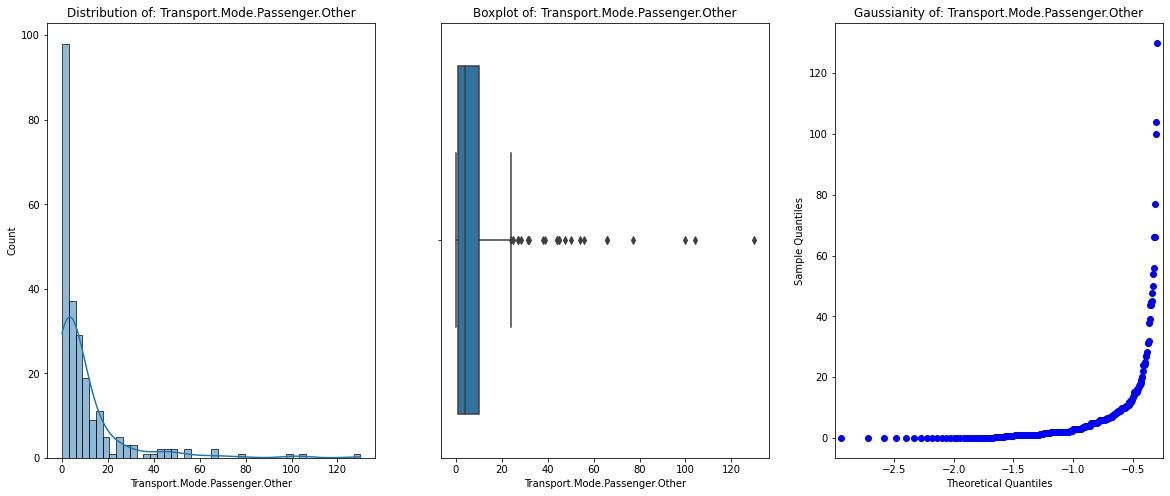

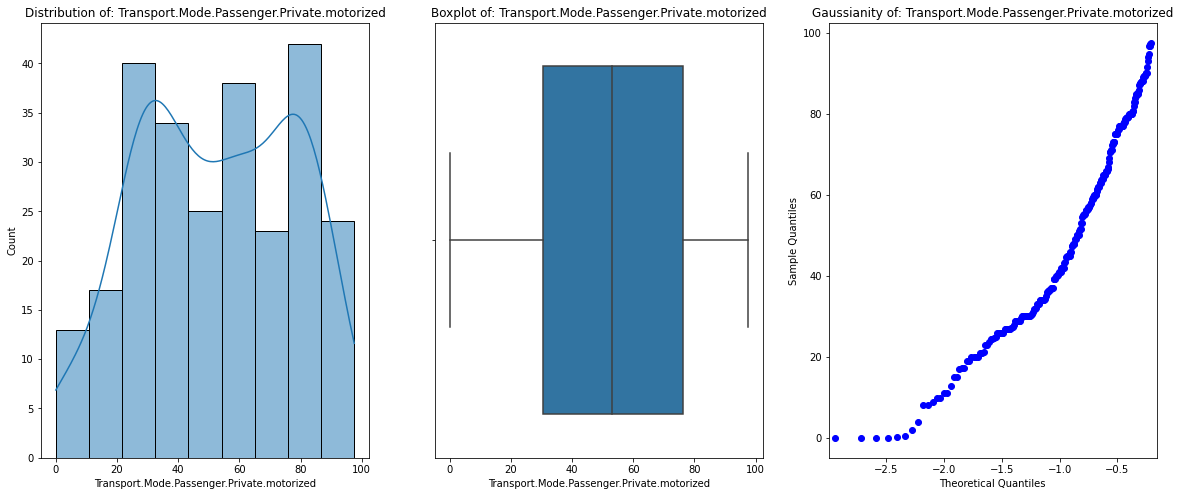

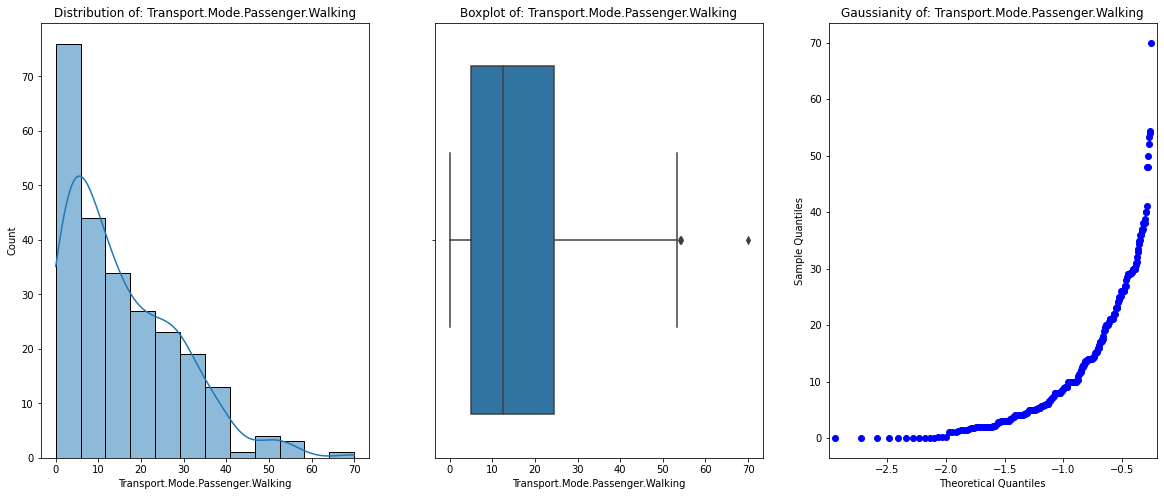

In [80]:
for numerical_feature in df_Transport.columns:
    fig, ax =plt.subplots(1,3,figsize=(20,8))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = df_Transport[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(df_Transport[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df_Transport[numerical_feature],line='s',ax=ax[2])
    fig.show()

Analysis for potable water supply
---

In [23]:
df['Potable.Water.Supply.Percent'].notna().sum()

520

<AxesSubplot:ylabel='Frequency'>

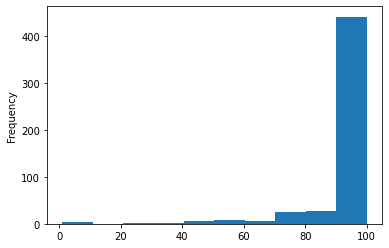

In [24]:
df['Potable.Water.Supply.Percent'].plot.hist()

> Distribution of percentages of potable water supply for cities

Select numerical features
---

In [58]:
df_num = df._get_numeric_data()

In [59]:
for feature in df_num.columns:
    print(feature)

Unnamed: 0
Year.Reported.to.CDP
Account.Number
Population
Nb.Hazards.Type
Hazards.Exposure.Level
Adaptation.Challenges.Health
Adaptation.Challenges.Economic
Adaptation.Challenges.Environment
Adaptation.Challenges.Infrastructure
Adaptation.Challenges.Social
Adaptation.Challenges.Governance
Adaptation.Challenges.Education
Adaptation.Challenges.Level
Nb.Adaptation.Actions
Electricity.Source.Biomass
Electricity.Source.Coal
Electricity.Source.Gas
Electricity.Source.Geothermal
Electricity.Source.Hydro
Electricity.Source.Nuclear
Electricity.Source.Oil
Electricity.Source.Other
Electricity.Source.Solar
Electricity.Source.Wind
Electricity.Source.Renewable
Transport.Mode.Passenger.Public
Transport.Mode.Passenger.Cycling
Transport.Mode.Passenger.Other
Transport.Mode.Passenger.Private.motorized
Transport.Mode.Passenger.Walking
Potable.Water.Supply.Percent
lat
long


Primary features to drop : 'Unnamed: 0', 'Year.Reported.to.CDP', 'Account.Number', 'lat','long'

In [60]:
num_drop_features = ['Unnamed: 0', 'Year.Reported.to.CDP', 'Account.Number', 'lat','long']

In [64]:
df_num_cleaned = df_num.drop(columns=num_drop_features)

In [65]:
df_num_cleaned.head()

,Population,Nb.Hazards.Type,Hazards.Exposure.Level,Adaptation.Challenges.Health,Adaptation.Challenges.Economic,Adaptation.Challenges.Environment,Adaptation.Challenges.Infrastructure,Adaptation.Challenges.Social,Adaptation.Challenges.Governance,Adaptation.Challenges.Education,Adaptation.Challenges.Level,Nb.Adaptation.Actions,Electricity.Source.Biomass,Electricity.Source.Coal,Electricity.Source.Gas,Electricity.Source.Geothermal,Electricity.Source.Hydro,Electricity.Source.Nuclear,Electricity.Source.Oil,Electricity.Source.Other,Electricity.Source.Solar,Electricity.Source.Wind,Electricity.Source.Renewable,Transport.Mode.Passenger.Public,Transport.Mode.Passenger.Cycling,Transport.Mode.Passenger.Other,Transport.Mode.Passenger.Private.motorized,Transport.Mode.Passenger.Walking,Potable.Water.Supply.Percent
0,692587.0,3.0,41.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,6,0.0,24.0,20.0,0.0,9.0,37.0,0.0,7.0,1.5,1.5,12.0,2.1,0.2,6.7,89.0,2.0,100.0
1,68823.0,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0,0.0,0.0,98.0,0.0,0.0,0.0,2.0,0.0,100.0,NaN,NaN,NaN,NaN,NaN,100.0
2,513584.0,9.0,121.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0.0,NaN,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,100.0,41.0,4.0,0.0,26.0,29.0,100.0
3,246348.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,716492.0,4.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0.0,39.0,33.0,0.0,1.0,0.0,0.0,0.0,3.0,24.0,28.0,NaN,NaN,NaN,NaN,NaN,100.0


In [67]:
for feature in list(df_num_cleaned.columns):
    print(feature)

Population
Nb.Hazards.Type
Hazards.Exposure.Level
Adaptation.Challenges.Health
Adaptation.Challenges.Economic
Adaptation.Challenges.Environment
Adaptation.Challenges.Infrastructure
Adaptation.Challenges.Social
Adaptation.Challenges.Governance
Adaptation.Challenges.Education
Adaptation.Challenges.Level
Nb.Adaptation.Actions
Electricity.Source.Biomass
Electricity.Source.Coal
Electricity.Source.Gas
Electricity.Source.Geothermal
Electricity.Source.Hydro
Electricity.Source.Nuclear
Electricity.Source.Oil
Electricity.Source.Other
Electricity.Source.Solar
Electricity.Source.Wind
Electricity.Source.Renewable
Transport.Mode.Passenger.Public
Transport.Mode.Passenger.Cycling
Transport.Mode.Passenger.Other
Transport.Mode.Passenger.Private.motorized
Transport.Mode.Passenger.Walking
Potable.Water.Supply.Percent


In [ ]:
for numerical_feature in num_features:
    
    fig, ax =plt.subplots(1,3,figsize=(20,8))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = inputs_num[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(inputs_num[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(inputs_num[numerical_feature],line='s',ax=ax[2])
    fig.show()

/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/gaetan/.pyenv/versions/3.8.5/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

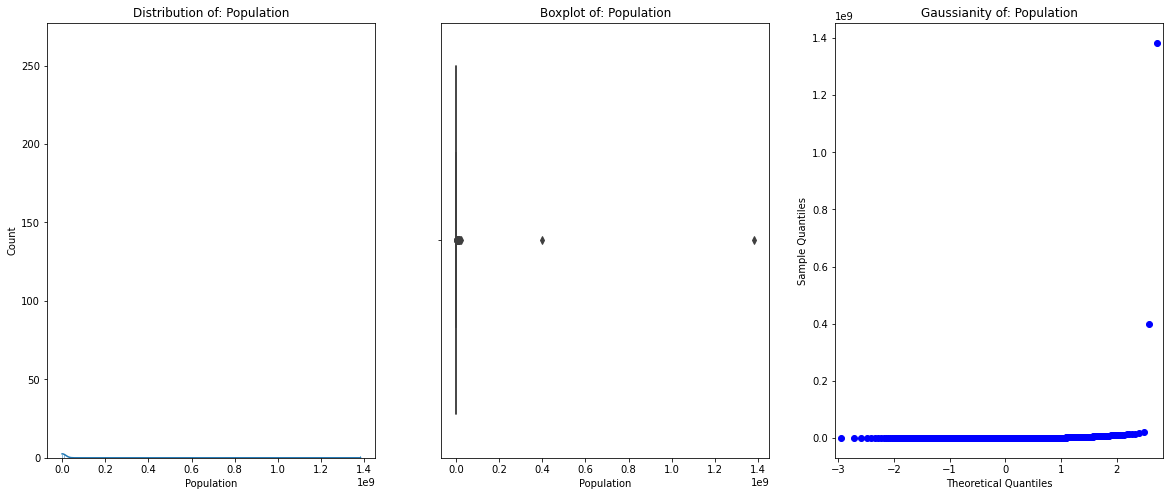

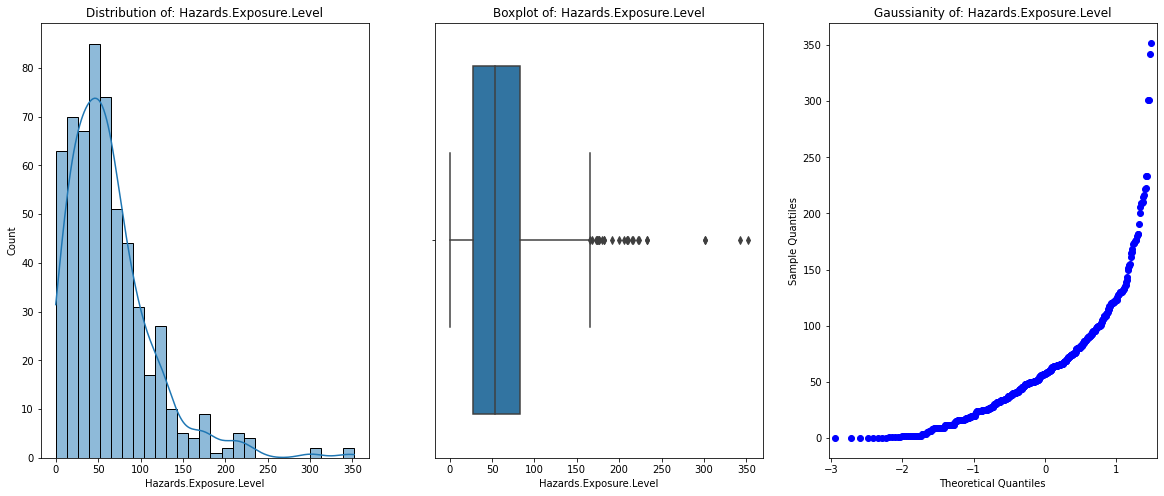

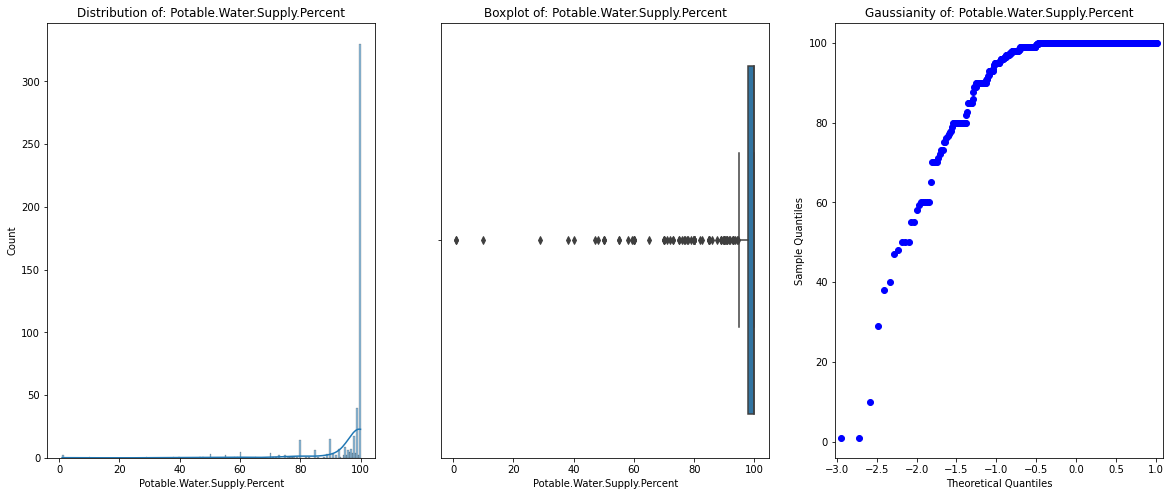

In [70]:
num_features = ['Population','Hazards.Exposure.Level','Potable.Water.Supply.Percent']

for numerical_feature in num_features:
    fig, ax =plt.subplots(1,3,figsize=(20,8))
    ax[0].set_title(f"Distribution of: {numerical_feature}")
    sns.histplot(data = df_num_cleaned[numerical_feature], kde=True, ax=ax[0])
    ax[1].set_title(f"Boxplot of: {numerical_feature}")
    sns.boxplot(df_num_cleaned[numerical_feature], ax=ax[1])
    ax[2].set_title(f"Gaussianity of: {numerical_feature}")
    qqplot(df_num_cleaned[numerical_feature],line='s',ax=ax[2])
    fig.show()